In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
train_path =  'C:/Users/47864/Desktop/ml-100k/ml-100k/u2.base'
test_path = 'C:/Users/47864/Desktop/ml-100k/ml-100k/u2.test'
train = np.loadtxt(train_path)
test = np.loadtxt(test_path)
R = np.zeros((943,1682))
for sample in train:
    R[int(sample[0])-1][int(sample[1])-1] = int(sample[2])

In [12]:
def compute_loss(user_w,movie_w,dataset):
    sum_loss = 0
    for sample in dataset:
        pred_rate = np.dot(user_w[int(sample[0]),:],movie_w[:,int(sample[1])])
        sum_loss += 1/2*(pred_rate-sample[2])**2
    return sum_loss/len(dataset)

In [13]:
def compute_gradient(user_w,movie_w,learning_rate):
    user_gradient = np.zeros(user_w.shape)
    movie_gradient = np.zeros(movie_w.shape)
    for row in range(user_w.shape[0]):
        col = int(random.choice(train[train[:,0]== (row+1)])[1])-1
        user_gradient[row] = -movie_w.T[col]*(R[row][col] -np.dot(user_w[row],movie_w.T[col]))
    
    for col in range(movie_w.shape[1]):
        try:
            row = int(random.choice(train[train[:,1]== (col+1)])[0])-1
        except:
            pass
        movie_gradient[:,col] = -user_w[row]*(R[row][col] - np.dot(user_w[row],movie_w.T[col]))
    user_w -= learning_rate*user_gradient
    movie_w -= learning_rate*movie_gradient
    return user_w,movie_w

In [14]:
def train_model(user_w,movie_w,iteration,learning_rate):
    loss_list = []
    loss = compute_loss(user_w,movie_w,test)
    loss_list.append(loss)
    print(loss)
    for i in range(iteration-1):
        user_w, moive_w = compute_gradient(user_w,movie_w,learning_rate)
        loss = compute_loss(user_w,movie_w,test)
        loss_list.append(loss)
        print(i, loss)
    return loss_list

8.78356317508
0 8.71324337794
1 8.66153906185
2 8.59732470731
3 8.5520707216
4 8.49006010266
5 8.43676796173
6 8.38700498987
7 8.34085365237
8 8.29804203955
9 8.26410068844
10 8.23155960503
11 8.19445372131
12 8.15809804849
13 8.12239955527
14 8.0818965556
15 8.06657704021
16 8.04365222131
17 8.01575120581
18 7.98916373068
19 7.96697163758
20 7.94331313093
21 7.92084025585
22 7.90068119698
23 7.88672910809
24 7.86703878669
25 7.84855647555
26 7.83091650664
27 7.81452312491
28 7.80056335877
29 7.7803102114
30 7.76500118946
31 7.74568525355
32 7.73552711448
33 7.71835260173
34 7.70010455544
35 7.68650314531
36 7.6757660074
37 7.66430941191
38 7.65346970166
39 7.63821814449
40 7.62516964859
41 7.60951569219
42 7.59971049669
43 7.59052906257
44 7.57885283032
45 7.56430903965
46 7.5530466803
47 7.54122750797
48 7.53100000977
49 7.51988019226
50 7.50504251061
51 7.48856095313
52 7.48378573415
53 7.46834104066
54 7.4568462427
55 7.44828973103
56 7.43679772808
57 7.42492180177
58 7.41461341485

464 1.01232065919
465 1.01392095379
466 1.01159906793
467 1.01299038862
468 1.01301501939
469 1.01491111382
470 1.01261367334
471 1.01254704573
472 1.01129543464
473 1.00872721255
474 1.00808880672
475 1.00751805381
476 1.00663059334
477 1.0056784003
478 1.00781582977
479 1.00890463847
480 1.00835200063
481 1.00964284842
482 1.0081480652
483 1.00676329234
484 1.00722664545
485 1.00687368978
486 1.0040315154
487 1.00441824325
488 1.00470052374
489 1.00500333166
490 1.00443193378
491 1.00613209578
492 1.00574657941
493 1.00702858074
494 1.0072505385
495 1.0079224704
496 1.01025218532
497 1.01023961617
498 1.00989521578
499 1.01063055824
500 1.01078464996
501 1.01095024097
502 1.0130095014
503 1.0145986839
504 1.01471082159
505 1.01633091869
506 1.01674958051
507 1.01637377883
508 1.01765858869
509 1.01730009794
510 1.01610942563
511 1.01745000417
512 1.02028991926
513 1.02031957393
514 1.01868116651
515 1.02142106202
516 1.02169452117
517 1.02389146797
518 1.02641613889
519 1.02697161821

918 1.01220631081
919 1.01350984602
920 1.00990603839
921 1.00860889684
922 1.00826446209
923 1.00735190213
924 1.00819821356
925 1.00832002265
926 1.01074433102
927 1.00936931293
928 1.01067215519
929 1.00804706934
930 1.00791114857
931 1.00810321984
932 1.0075807226
933 1.00902064114
934 1.00890758703
935 1.01090460701
936 1.00938115495
937 1.00832791262
938 1.00854696945
939 1.00895363267
940 1.00664963119
941 1.00643305769
942 1.00601470835
943 1.00613521376
944 1.00726464333
945 1.00625916871
946 1.00771753299
947 1.00830086076
948 1.00998374069
949 1.00716035353
950 1.00840466357
951 1.00786747711
952 1.00902475022
953 1.00680196652
954 1.00555891613
955 1.00560915747
956 1.00517047759
957 1.00423271668
958 1.00535624016
959 1.00653319525
960 1.00883618869
961 1.00737658223
962 1.00677246999
963 1.00984314093
964 1.00963868195
965 1.01249257483
966 1.01180276545
967 1.01286481846
968 1.01391605151
969 1.01144606629
970 1.01100394287
971 1.01321094107
972 1.01326942585
973 1.01349

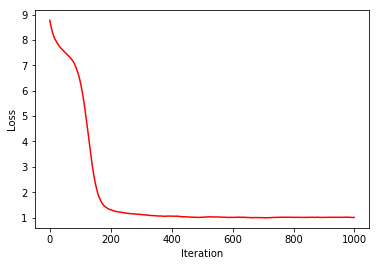

In [15]:
if __name__ == '__main__':
    user_w = np.random.randn(943,4)
    movie_w = np.random.randn(4,1682)
    iteration = 1000
    learning_rate = 0.01
    loss_list = train_model(user_w,movie_w,iteration,learning_rate)
    plt.plot(range(iteration),loss_list,color = 'r')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()